In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
df = pd.read_csv('pdl1.csv')
df

,SMILES,IC50,pIC50
0,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1363.0,5.865504
1,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,878.0,6.056505
2,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,743.0,6.129011
3,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1728.0,5.762456
4,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,905.0,6.043351
...,...,...,...
1435,CC1=C(C2=NN=C(NC3=CC(CN4CCOCC4)=CC=C3)O2)C=CC=...,64.1,7.193142
1436,O=C(C(C1=NN=C(N2CCN(CC2)C(C(NCC3=CC(Cl)=C(C=C3...,131.0,6.882729
1437,O=C(C1=NN=C(C2=CNC(NC2=O)=O)C=C1)NCCNCC3=CC=C(...,108.0,6.966576
1438,N#CC1=CC=CC(COC2=CC(OCC3=C(C)C(C4=CC=CC=C4)=CC...,6.0,8.221849


#### 1. Remove duplicate from SMILES

In [3]:
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] 
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

In [4]:
canon_SMILES = canonical_smiles(df.SMILES)

In [5]:
#New dataframe with canonical SMILES
df['canon_SMILES'] = canon_SMILES
df

,SMILES,IC50,pIC50,canon_SMILES
0,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1363.0,5.865504,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4)c...
1,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,878.0,6.056505,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4C)...
2,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,743.0,6.129011,CCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CNC...
3,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1728.0,5.762456,CCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CN...
4,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,905.0,6.043351,COCCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(...
...,...,...,...,...
1435,CC1=C(C2=NN=C(NC3=CC(CN4CCOCC4)=CC=C3)O2)C=CC=...,64.1,7.193142,Cc1c(-c2ccccc2)cccc1-c1nnc(Nc2cccc(CN3CCOCC3)c...
1436,O=C(C(C1=NN=C(N2CCN(CC2)C(C(NCC3=CC(Cl)=C(C=C3...,131.0,6.882729,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CNC(C)(C)C(=O)N3...
1437,O=C(C1=NN=C(C2=CNC(NC2=O)=O)C=C1)NCCNCC3=CC=C(...,108.0,6.966576,COc1nc(-c2cccc(-c3ccccc3)c2C)ccc1CNCCNC(=O)c1c...
1438,N#CC1=CC=CC(COC2=CC(OCC3=C(C)C(C4=CC=CC=C4)=CC...,6.0,8.221849,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN3CCCCC3C(=O)N3...


In [6]:
df_new = df.drop_duplicates('canon_SMILES')
df_new

,SMILES,IC50,pIC50,canon_SMILES
0,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1363.0,5.865504,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4)c...
1,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,878.0,6.056505,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4C)...
2,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,743.0,6.129011,CCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CNC...
3,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1728.0,5.762456,CCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CN...
4,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,905.0,6.043351,COCCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(...
...,...,...,...,...
1435,CC1=C(C2=NN=C(NC3=CC(CN4CCOCC4)=CC=C3)O2)C=CC=...,64.1,7.193142,Cc1c(-c2ccccc2)cccc1-c1nnc(Nc2cccc(CN3CCOCC3)c...
1436,O=C(C(C1=NN=C(N2CCN(CC2)C(C(NCC3=CC(Cl)=C(C=C3...,131.0,6.882729,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CNC(C)(C)C(=O)N3...
1437,O=C(C1=NN=C(C2=CNC(NC2=O)=O)C=C1)NCCNCC3=CC=C(...,108.0,6.966576,COc1nc(-c2cccc(-c3ccccc3)c2C)ccc1CNCCNC(=O)c1c...
1438,N#CC1=CC=CC(COC2=CC(OCC3=C(C)C(C4=CC=CC=C4)=CC...,6.0,8.221849,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN3CCCCC3C(=O)N3...


In [11]:
df_reset_index = df_new.reset_index()
df_reset_index

,index,SMILES,IC50,pIC50,canon_SMILES
0,0,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1363.0,5.865504,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4)c...
1,1,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,878.0,6.056505,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4C)...
2,2,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,743.0,6.129011,CCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CNC...
3,3,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1728.0,5.762456,CCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CN...
4,4,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,905.0,6.043351,COCCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(...
...,...,...,...,...,...
1361,1435,CC1=C(C2=NN=C(NC3=CC(CN4CCOCC4)=CC=C3)O2)C=CC=...,64.1,7.193142,Cc1c(-c2ccccc2)cccc1-c1nnc(Nc2cccc(CN3CCOCC3)c...
1362,1436,O=C(C(C1=NN=C(N2CCN(CC2)C(C(NCC3=CC(Cl)=C(C=C3...,131.0,6.882729,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CNC(C)(C)C(=O)N3...
1363,1437,O=C(C1=NN=C(C2=CNC(NC2=O)=O)C=C1)NCCNCC3=CC=C(...,108.0,6.966576,COc1nc(-c2cccc(-c3ccccc3)c2C)ccc1CNCCNC(=O)c1c...
1364,1438,N#CC1=CC=CC(COC2=CC(OCC3=C(C)C(C4=CC=CC=C4)=CC...,6.0,8.221849,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN3CCCCC3C(=O)N3...


##### 2. Elimilate chiral molecules

In [14]:
# Use the Tanimoto index to evaluate the similarity between two substances based on fingerprints

# A. Generate a function to calculate Morgan fingerprint
for index, row in df_reset_index.iterrows():
    smiles = row['canon_SMILES']
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=2048)
    df_reset_index.at[index, 'fp'] = fp
df_reset_index

[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerator
[01:34:07] DEPRECATION WARNING: please use MorganGenerat

,index,SMILES,IC50,pIC50,canon_SMILES,fp
0,0,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1363.0,5.865504,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4)c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,878.0,6.056505,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4C)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,743.0,6.129011,CCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CNC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1728.0,5.762456,CCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CN...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,905.0,6.043351,COCCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...,...,...,...
1361,1435,CC1=C(C2=NN=C(NC3=CC(CN4CCOCC4)=CC=C3)O2)C=CC=...,64.1,7.193142,Cc1c(-c2ccccc2)cccc1-c1nnc(Nc2cccc(CN3CCOCC3)c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1362,1436,O=C(C(C1=NN=C(N2CCN(CC2)C(C(NCC3=CC(Cl)=C(C=C3...,131.0,6.882729,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CNC(C)(C)C(=O)N3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1363,1437,O=C(C1=NN=C(C2=CNC(NC2=O)=O)C=C1)NCCNCC3=CC=C(...,108.0,6.966576,COc1nc(-c2cccc(-c3ccccc3)c2C)ccc1CNCCNC(=O)c1c...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1364,1438,N#CC1=CC=CC(COC2=CC(OCC3=C(C)C(C4=CC=CC=C4)=CC...,6.0,8.221849,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN3CCCCC3C(=O)N3...,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [17]:
from rdkit import DataStructs
# B. Generate a function to calculate Tanimoto coefficient
def calc_tanimoto(fp1, fp2):
    tc = DataStructs.TanimotoSimilarity(fp1, fp2)
    return round(tc,2)
# If the Tanimoto index = 1, the two SMILES are the same

In [18]:
y = df_reset_index['fp']
Y = pd.DataFrame(y)
x = df_reset_index['fp']
X = pd.DataFrame(x)

matrix = np.zeros((len(X), len(Y)))

for i, row_x in X.iterrows():
    smiles_x = row_x['fp']
    for j, row_y in Y.iterrows():
        smiles_y = row_y['fp']
        coefficient = calc_tanimoto(smiles_x, smiles_y)
        matrix[i, j] = coefficient

matrixx = pd.DataFrame(matrix)

In [19]:
matrixx

,0,1,2,3,4,5,6,7,8,9,...,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365
0,1.00,0.72,0.70,0.68,0.65,0.63,0.63,0.61,0.61,0.61,...,0.11,0.10,0.12,0.10,0.10,0.10,0.35,0.13,0.30,0.28
1,0.72,1.00,0.79,0.78,0.74,0.72,0.72,0.70,0.70,0.70,...,0.11,0.10,0.12,0.10,0.09,0.10,0.35,0.12,0.30,0.28
2,0.70,0.79,1.00,0.85,0.80,0.77,0.78,0.74,0.74,0.75,...,0.11,0.10,0.12,0.10,0.10,0.11,0.35,0.12,0.30,0.29
3,0.68,0.78,0.85,1.00,0.84,0.81,0.82,0.78,0.78,0.80,...,0.10,0.10,0.11,0.09,0.09,0.10,0.34,0.12,0.30,0.28
4,0.65,0.74,0.80,0.84,1.00,0.82,0.82,0.79,0.79,0.79,...,0.10,0.10,0.11,0.09,0.09,0.10,0.33,0.13,0.28,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,0.10,0.10,0.11,0.10,0.10,0.10,0.10,0.10,0.10,0.10,...,0.59,0.72,0.57,0.60,0.58,1.00,0.16,0.16,0.15,0.12
1362,0.35,0.35,0.35,0.34,0.33,0.33,0.33,0.32,0.31,0.31,...,0.15,0.16,0.17,0.15,0.16,0.16,1.00,0.25,0.64,0.51
1363,0.13,0.12,0.12,0.12,0.13,0.11,0.12,0.12,0.11,0.11,...,0.21,0.17,0.22,0.19,0.19,0.16,0.25,1.00,0.24,0.19
1364,0.30,0.30,0.30,0.30,0.28,0.28,0.28,0.29,0.28,0.28,...,0.14,0.17,0.14,0.14,0.14,0.15,0.64,0.24,1.00,0.80


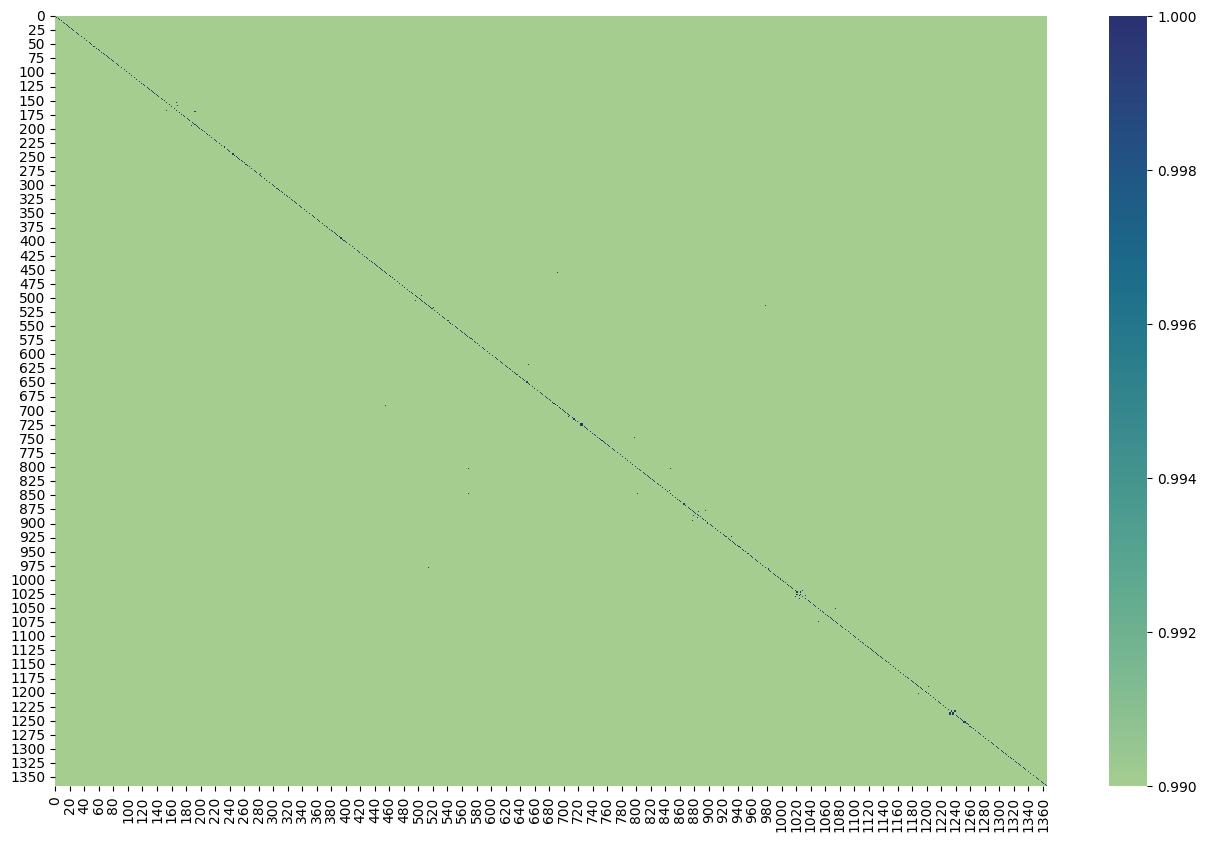

In [20]:
plt.figure(figsize= (16,10))
sns.heatmap(matrixx, cmap = "crest", vmin= 0.99, vmax = 1.00)
plt.show()

In [21]:
#Index of Chiral SMILES
index_to_drop = []


In [22]:
for i in range(0, matrixx.shape[1]):
    if any(matrixx[matrixx.iloc[:,i]==1].count() >1):
        index_to_drop.append(i)
print(index_to_drop)
print(len(index_to_drop))


[53, 54, 153, 158, 167, 168, 169, 186, 188, 192, 193, 194, 195, 230, 231, 232, 233, 244, 245, 262, 263, 279, 283, 305, 306, 307, 308, 392, 393, 394, 395, 396, 397, 398, 399, 400, 455, 496, 504, 505, 507, 508, 509, 513, 514, 517, 518, 519, 521, 540, 541, 544, 545, 548, 569, 571, 572, 573, 577, 608, 618, 622, 623, 635, 636, 640, 647, 648, 649, 650, 651, 652, 680, 681, 686, 687, 688, 691, 705, 706, 707, 710, 714, 715, 716, 717, 723, 724, 725, 726, 728, 729, 747, 752, 753, 794, 797, 798, 802, 813, 841, 846, 847, 865, 866, 867, 868, 871, 873, 874, 877, 879, 884, 886, 889, 895, 898, 899, 900, 901, 923, 924, 931, 941, 942, 953, 954, 956, 978, 979, 980, 981, 982, 998, 999, 1001, 1002, 1019, 1021, 1022, 1025, 1026, 1028, 1029, 1033, 1051, 1062, 1071, 1074, 1189, 1202, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1251, 1252, 1253, 1254, 1255, 1256, 1259, 1260, 1261, 1262, 1333, 1334]
173


In [24]:
df = df_reset_index.drop(index=index_to_drop)
df

,index,SMILES,IC50,pIC50,canon_SMILES,fp
0,0,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1363.0,5.865504,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4)c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,878.0,6.056505,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4C)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,743.0,6.129011,CCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CNC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1728.0,5.762456,CCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CN...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,905.0,6.043351,COCCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...,...,...,...
1361,1435,CC1=C(C2=NN=C(NC3=CC(CN4CCOCC4)=CC=C3)O2)C=CC=...,64.1,7.193142,Cc1c(-c2ccccc2)cccc1-c1nnc(Nc2cccc(CN3CCOCC3)c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1362,1436,O=C(C(C1=NN=C(N2CCN(CC2)C(C(NCC3=CC(Cl)=C(C=C3...,131.0,6.882729,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CNC(C)(C)C(=O)N3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1363,1437,O=C(C1=NN=C(C2=CNC(NC2=O)=O)C=C1)NCCNCC3=CC=C(...,108.0,6.966576,COc1nc(-c2cccc(-c3ccccc3)c2C)ccc1CNCCNC(=O)c1c...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1364,1438,N#CC1=CC=CC(COC2=CC(OCC3=C(C)C(C4=CC=CC=C4)=CC...,6.0,8.221849,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN3CCCCC3C(=O)N3...,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
